In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('./Medical_Cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

### checking null value count

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
LE = LabelEncoder()

In [8]:
le_c = ['region','sex','smoker']

In [9]:
for i in le_c:
    df[i] = LE.fit_transform(df[i])

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [11]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


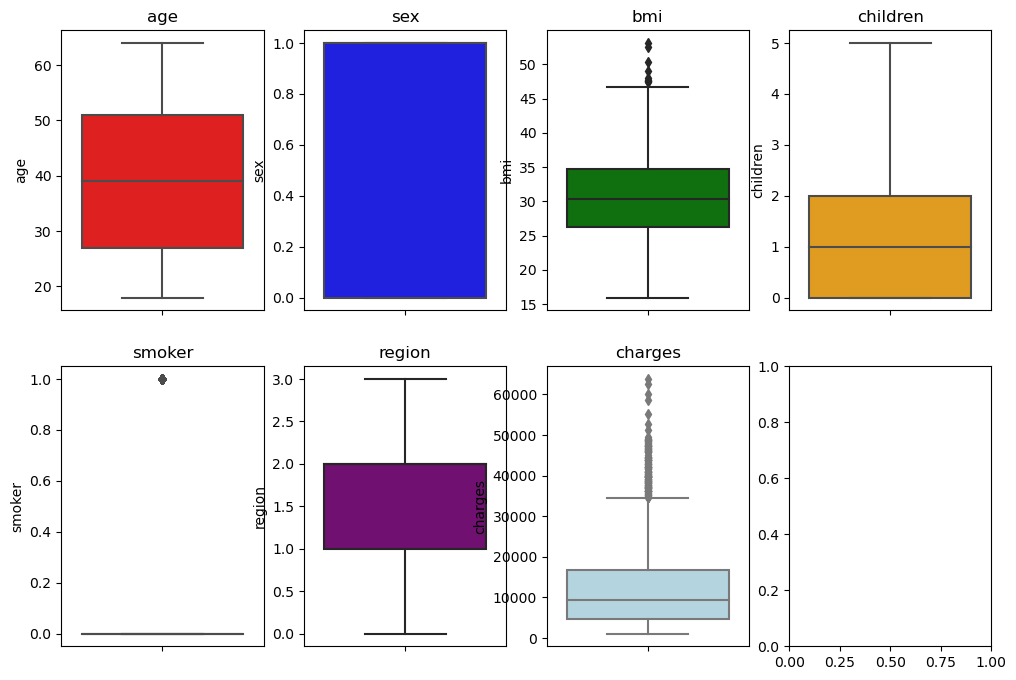

In [13]:
colours = ['Red','Blue','Green','Orange','Yellow','Purple','lightblue']
num_rows = 2
num_cols = 4
fig,axes = plt.subplots(nrows=num_rows,ncols=num_cols,figsize=(12,8))
for i, col in enumerate(df.columns):
    row_idx = i// num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    sns.boxplot(data=df,y=col,color = colours[i%len(colours)],ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')

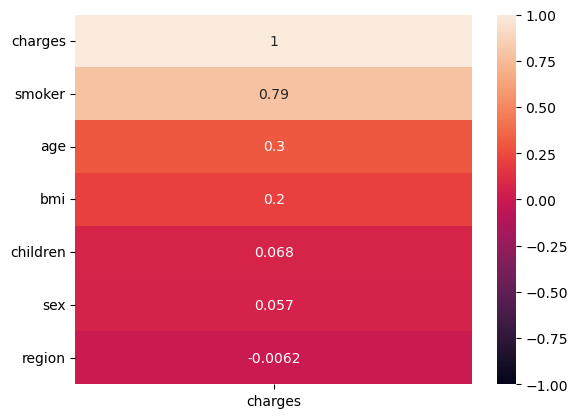

In [14]:
sns.heatmap(df.corr()[['charges']].sort_values(by='charges',ascending=False),vmin=-1,annot=True)
plt.show()

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
df1 = df[['smoker','age','bmi','charges']]

In [17]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44,shuffle=True)

### Feature Scaling

In [19]:
sc = StandardScaler()

In [20]:
x_train = sc.fit_transform(x_train)

In [21]:
x_test = sc.transform(x_test)

### Model selection

In [22]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}
    

In [23]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("Model trained with {}".format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    y_pred = model.predict(x_test)
    score = r2_score(y_test,y_pred)*100
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print('training_score: ',training_score)
    print('testing_score: ',testing_score)
    print('r2_score: ', score)
    print('mean_absolute_error: ',mae)
    print('mean_squared_error: ',mse)
    print('root_mean_squared_error: ',rmse)
    print('*'*70)

Model trained with LinearRegression
training_score:  74.64186279584271
testing_score:  75.14558564490898
r2_score:  75.14558564490898
mean_absolute_error:  4132.615805153369
mean_squared_error:  4132.615805153369
root_mean_squared_error:  64.28542451561917
**********************************************************************
Model trained with Ridge
training_score:  74.6417985947995
testing_score:  75.1494534218207
r2_score:  75.1494534218207
mean_absolute_error:  4133.543435683506
mean_squared_error:  4133.543435683506
root_mean_squared_error:  64.292639047433
**********************************************************************
Model trained with Lasso
training_score:  74.64186092223409
testing_score:  75.14639454088145
r2_score:  75.14639454088145
mean_absolute_error:  4132.494115208425
mean_squared_error:  4132.494115208425
root_mean_squared_error:  64.28447802703562
**********************************************************************
Model trained with DecisionTreeRegressor
tr

### fitting to the model

In [24]:
model = RandomForestRegressor()

In [25]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
y_pred = model.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.8404174618663518

### Training score

In [28]:
model.score(x_train,y_train)

0.9687100884000136

### Testing score

In [29]:
model.score(x_test,y_test)

0.8404174618663518

In [31]:
OUTPUT = pd.DataFrame(zip(y_test,y_pred),columns=['ACTUAL','PREDICTED'])
OUTPUT.head()

,ACTUAL,PREDICTED
0,4738.26820,5739.920341
1,2055.32490,2711.140028
2,7445.91800,7723.409698
3,19361.99880,19834.703469
4,2755.02095,2187.001398


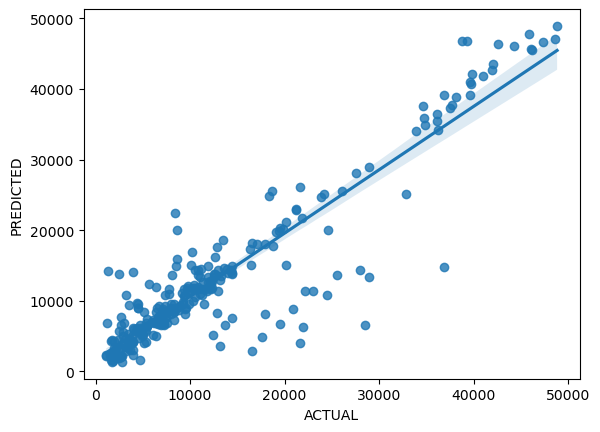

In [34]:
sns.regplot(data=OUTPUT,x = 'ACTUAL',y = 'PREDICTED')
plt.show()